In [1]:
import pickle
import pandas as pd
from msresist.pre_processing import MergeDfbyMean, FormatName, VFilter, preprocessing
from msresist.motifs import MapMotifs
from msresist.figures.figure1 import plotVarReplicates
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [2]:
br1 = pd.read_csv("msresist/data/Validations/Experimental/MassSpec/PC9_Dasatinib_DR_BR1.csv")
br2 = pd.read_csv("msresist/data/Validations/Experimental/MassSpec/PC9_Dasatinib_DR_BR2.csv")
filesin = [br1, br2]

In [3]:
with open("msresist/data/pickled_models/AXLmodel_PAM250_W2-5_5CL", "rb") as m:
    model = pickle.load(m)

axl_ms = preprocessing(Axlmuts_ErlAF154=True, Vfilter=True, FCfilter=True, log2T=True, mc_row=True)
axl_ms["Cluster"] = model.labels()

In [4]:
X = pd.concat(filesin)
fullnames, genes = FormatName(X)
X["Protein"] = fullnames
X.insert(2, "Gene", genes)
X["Sequence"] = [s.split(".")[1] for s in X["Sequence"]]
X.iloc[:, 3:] = X.iloc[:, 3:].astype("float64")

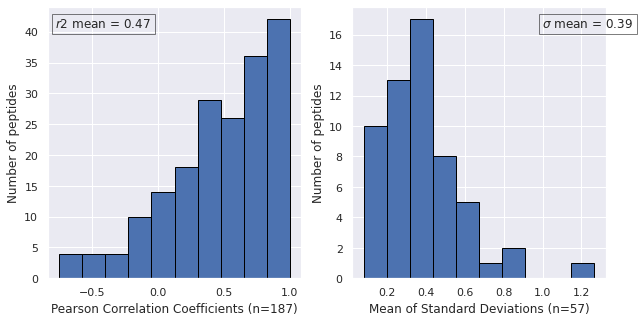

In [6]:
_, ax = plt.subplots(1, 2, figsize=(10, 5))
plotVarReplicates(ax, X, Set_CorrCoefFilter=False, StdFilter=False)

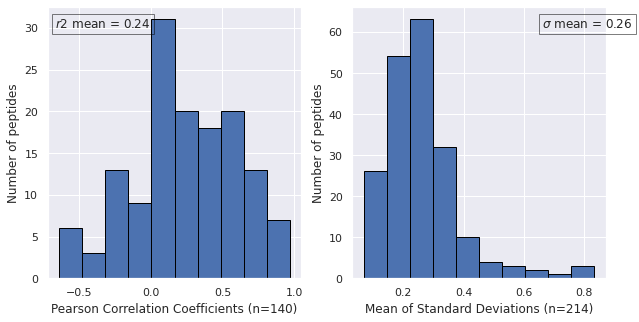

In [6]:
axl_raw = preprocessing(Axlmuts_ErlAF154=True, rawdata=True)
_, ax = plt.subplots(1, 2, figsize=(10, 5))
plotVarReplicates(ax, axl_raw, Set_CorrCoefFilter=False, StdFilter=False)

In [4]:
X = MapMotifs(X, genes)

data_headers = list(X.select_dtypes(include=["float64"]).columns)
merging_indices = list(X.select_dtypes(include=["object"]).columns)

X = MergeDfbyMean(X, data_headers, merging_indices).reset_index()[merging_indices + data_headers]

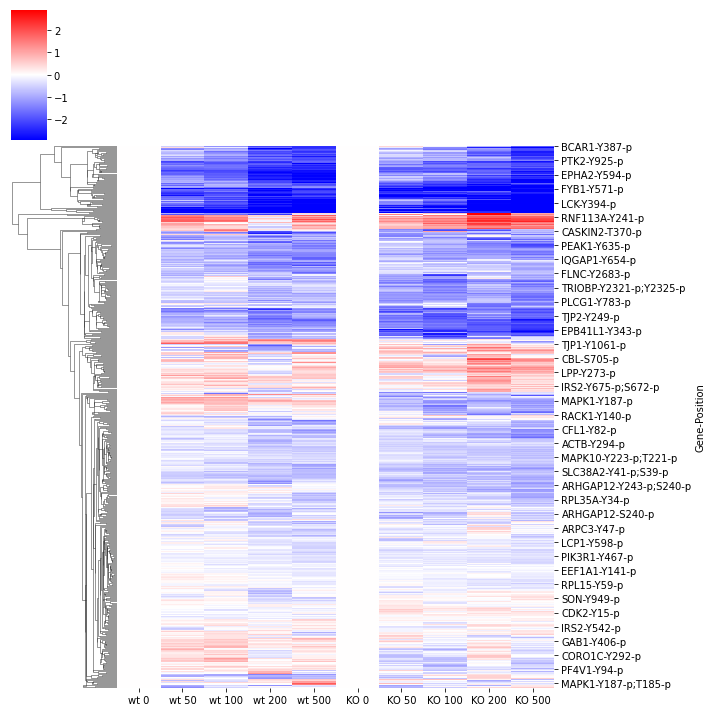

In [6]:
data = X.set_index(["Gene", "Position"]).select_dtypes(include=["float64"])
lim = np.max(abs(data.values)) * 0.5

g = sns.clustermap(data, method="centroid", cmap="bwr", robust=True, vmax=lim, vmin=-lim, figsize=(10, 10), xticklabels=True, col_cluster=False)

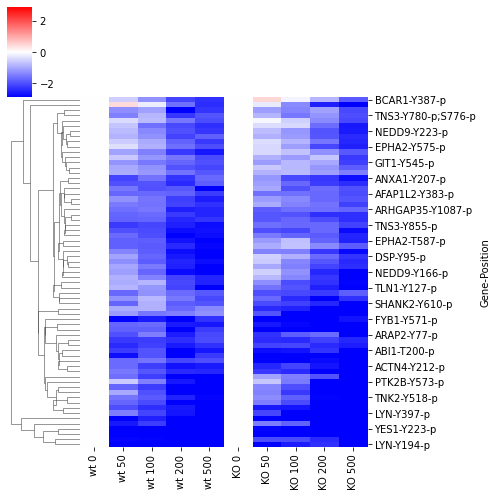

In [7]:
data_dr = X.iloc[g.dendrogram_row.reordered_ind[:67], :].set_index(["Gene", "Position"]).select_dtypes(include=["float64"])

lim = np.max(abs(data_dr.values)) * 0.5

g_dr = sns.clustermap(data_dr, method="centroid", cmap="bwr", robust=True, vmax=lim, vmin=-lim, figsize=(7, 7), xticklabels=True, col_cluster=False)

In [8]:
dict(zip(X.iloc[g.dendrogram_row.reordered_ind[:67], 2].values, X.iloc[g.dendrogram_row.reordered_ind[:67], 3].values))

{'BCAR1': 'Y327-p',
 'ABL1': 'Y393-p',
 'DOK1': 'Y362-p',
 'TNS3': 'Y855-p',
 'PXN': 'Y88-p;S85-p',
 'NEDD9': 'Y92-p',
 'EPHA2': 'Y594-p',
 'DSP': 'Y95-p',
 'GIT1': 'Y545-p',
 'PTK2': 'Y570-p',
 'ANXA1': 'Y207-p',
 'SH2D3A': 'Y231-p',
 'STAT6': 'Y641-p',
 'AFAP1L2': 'Y383-p',
 'FRK': 'Y497-p',
 'ARHGAP35': 'Y1105-p',
 'TNK2': 'Y518-p',
 'CTTN': 'Y446-p',
 'PARD3': 'Y489-p',
 'TJP1': 'Y830-p',
 'CRKL': 'Y132-p;T130-p',
 'TLN1': 'Y127-p',
 'PRKCD': 'Y313-p',
 'CFL1': 'Y140-p',
 'SHANK2': 'Y610-p',
 'ABI1': 'T200-p',
 'WASL': 'Y256-p',
 'FYB1': 'Y571-p',
 'ANXA2': 'Y238-p;S234-p',
 'SHB': 'S247-p',
 'ARAP2': 'Y77-p',
 'ITSN2': 'Y553-p',
 'ACTN4': 'Y212-p',
 'PTK2B': 'Y573-p',
 'LCK': 'Y394-p',
 'ANKS1A': 'Y455-p',
 'ACTN1': 'Y193-p',
 'LYN': 'Y194-p',
 'RIN1': 'Y36-p',
 'YES1': 'Y222-p',
 'BCAR3': 'Y117-p'}

In [9]:
axl_ms[(axl_ms["Gene"] == "BCAR1")][["Gene", "Position", "Cluster"]]

,Gene,Position,Cluster
77,BCAR1,Y249-p,4
78,BCAR1,Y67-p,4
80,BCAR1,Y327-p,4
81,BCAR1,Y362-p,4
82,BCAR1,Y372-p,4
83,BCAR1,Y234-p,4
85,BCAR1,Y410-p,4
86,BCAR1,Y267-p,4


In [10]:
axl_ms[(axl_ms["Gene"] == "ABL1")][["Gene", "Position", "Cluster"]]

,Gene,Position,Cluster
510,ABL1,Y185-p,4


In [11]:
axl_ms[(axl_ms["Gene"] == "DOK1")][["Gene", "Position", "Cluster"]]

,Gene,Position,Cluster
136,DOK1,Y409-p,4
137,DOK1,T406-p,5
138,DOK1,S316-p,5
139,DOK1,Y296-p,4


In [12]:
axl_ms[(axl_ms["Gene"] == "TNS3")][["Gene", "Position", "Cluster"]]

,Gene,Position,Cluster
486,TNS3,Y780-p,1
487,TNS3,Y780-p;S776-p,4
489,TNS3,Y354-p,4


In [13]:
axl_ms[(axl_ms["Gene"] == "PXN")][["Gene", "Position", "Cluster"]]

,Gene,Position,Cluster
332,PXN,Y88-p,4
333,PXN,Y88-p;S85-p,4


In [14]:
cl4 = pd.read_csv("msresist/data/cluster_members/CPTACmodel_Members_C4.csv")

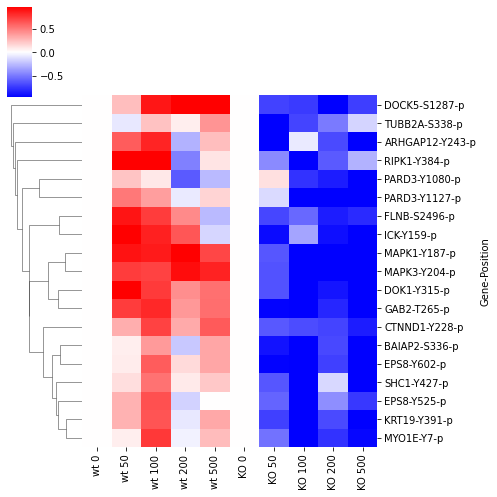

In [15]:
data_ud = X.iloc[g.dendrogram_row.reordered_ind[246:265], :].set_index(["Gene", "Position"]).select_dtypes(include=["float64"])

lim = np.max(abs(data_ud.values)) * 0.5

g_ud = sns.clustermap(data_ud, method="centroid", cmap="bwr", robust=True, vmax=lim, vmin=-lim, figsize=(7, 7), xticklabels=True, col_cluster=False)

In [17]:
axl_ms[(axl_ms["Gene"] == "ICK")][["Gene", "Position", "Cluster"]]

,Gene,Position,Cluster
444,ICK,S152-p,3
445,ICK,Y159-p,2
446,ICK,Y159-p;T157-p,1


In [26]:
axl_ms[(axl_ms["Gene"] == "MAPK3") | (axl_ms["Gene"] == "MAPK1")][["Gene", "Position", "Cluster"]]

,Gene,Position,Cluster
304,MAPK1,Y187-p,2
309,MAPK3,Y204-p,2
